🚀 LekhMitra Data Preprocessing Started!
🎯 LekhMitra Data Preprocessing Pipeline
🚀 Starting comprehensive data preparation for pen movement detection
📊 Loading Handwriting & Personality Traits Dataset...
❌ Error loading datasets: [Errno 2] No such file or directory: 'handwriting_personality_large_dataset.csv'
💡 Creating sample datasets for demonstration...

🧹 DATA CLEANING & EXPLORATION

📋 Dataset: HANDWRITING
Shape: (2000, 16)
✅ No missing values found
🔍 Removing outliers from columns: ['writing_speed', 'pressure_avg', 'letter_size']
✅ Removed 39 outlier rows (1.9%)
📊 Summary Statistics:
       user_id  writing_speed  pressure_avg  pressure_var  letter_size  \
count  1961.00        1961.00       1961.00       1961.00      1961.00   
mean    999.27          50.78          0.70          0.10         3.50   
std     577.25          14.33          0.20          0.05         0.81   
min       1.00          11.69          0.15         -0.06         1.22   
25%     499.00          40.85      

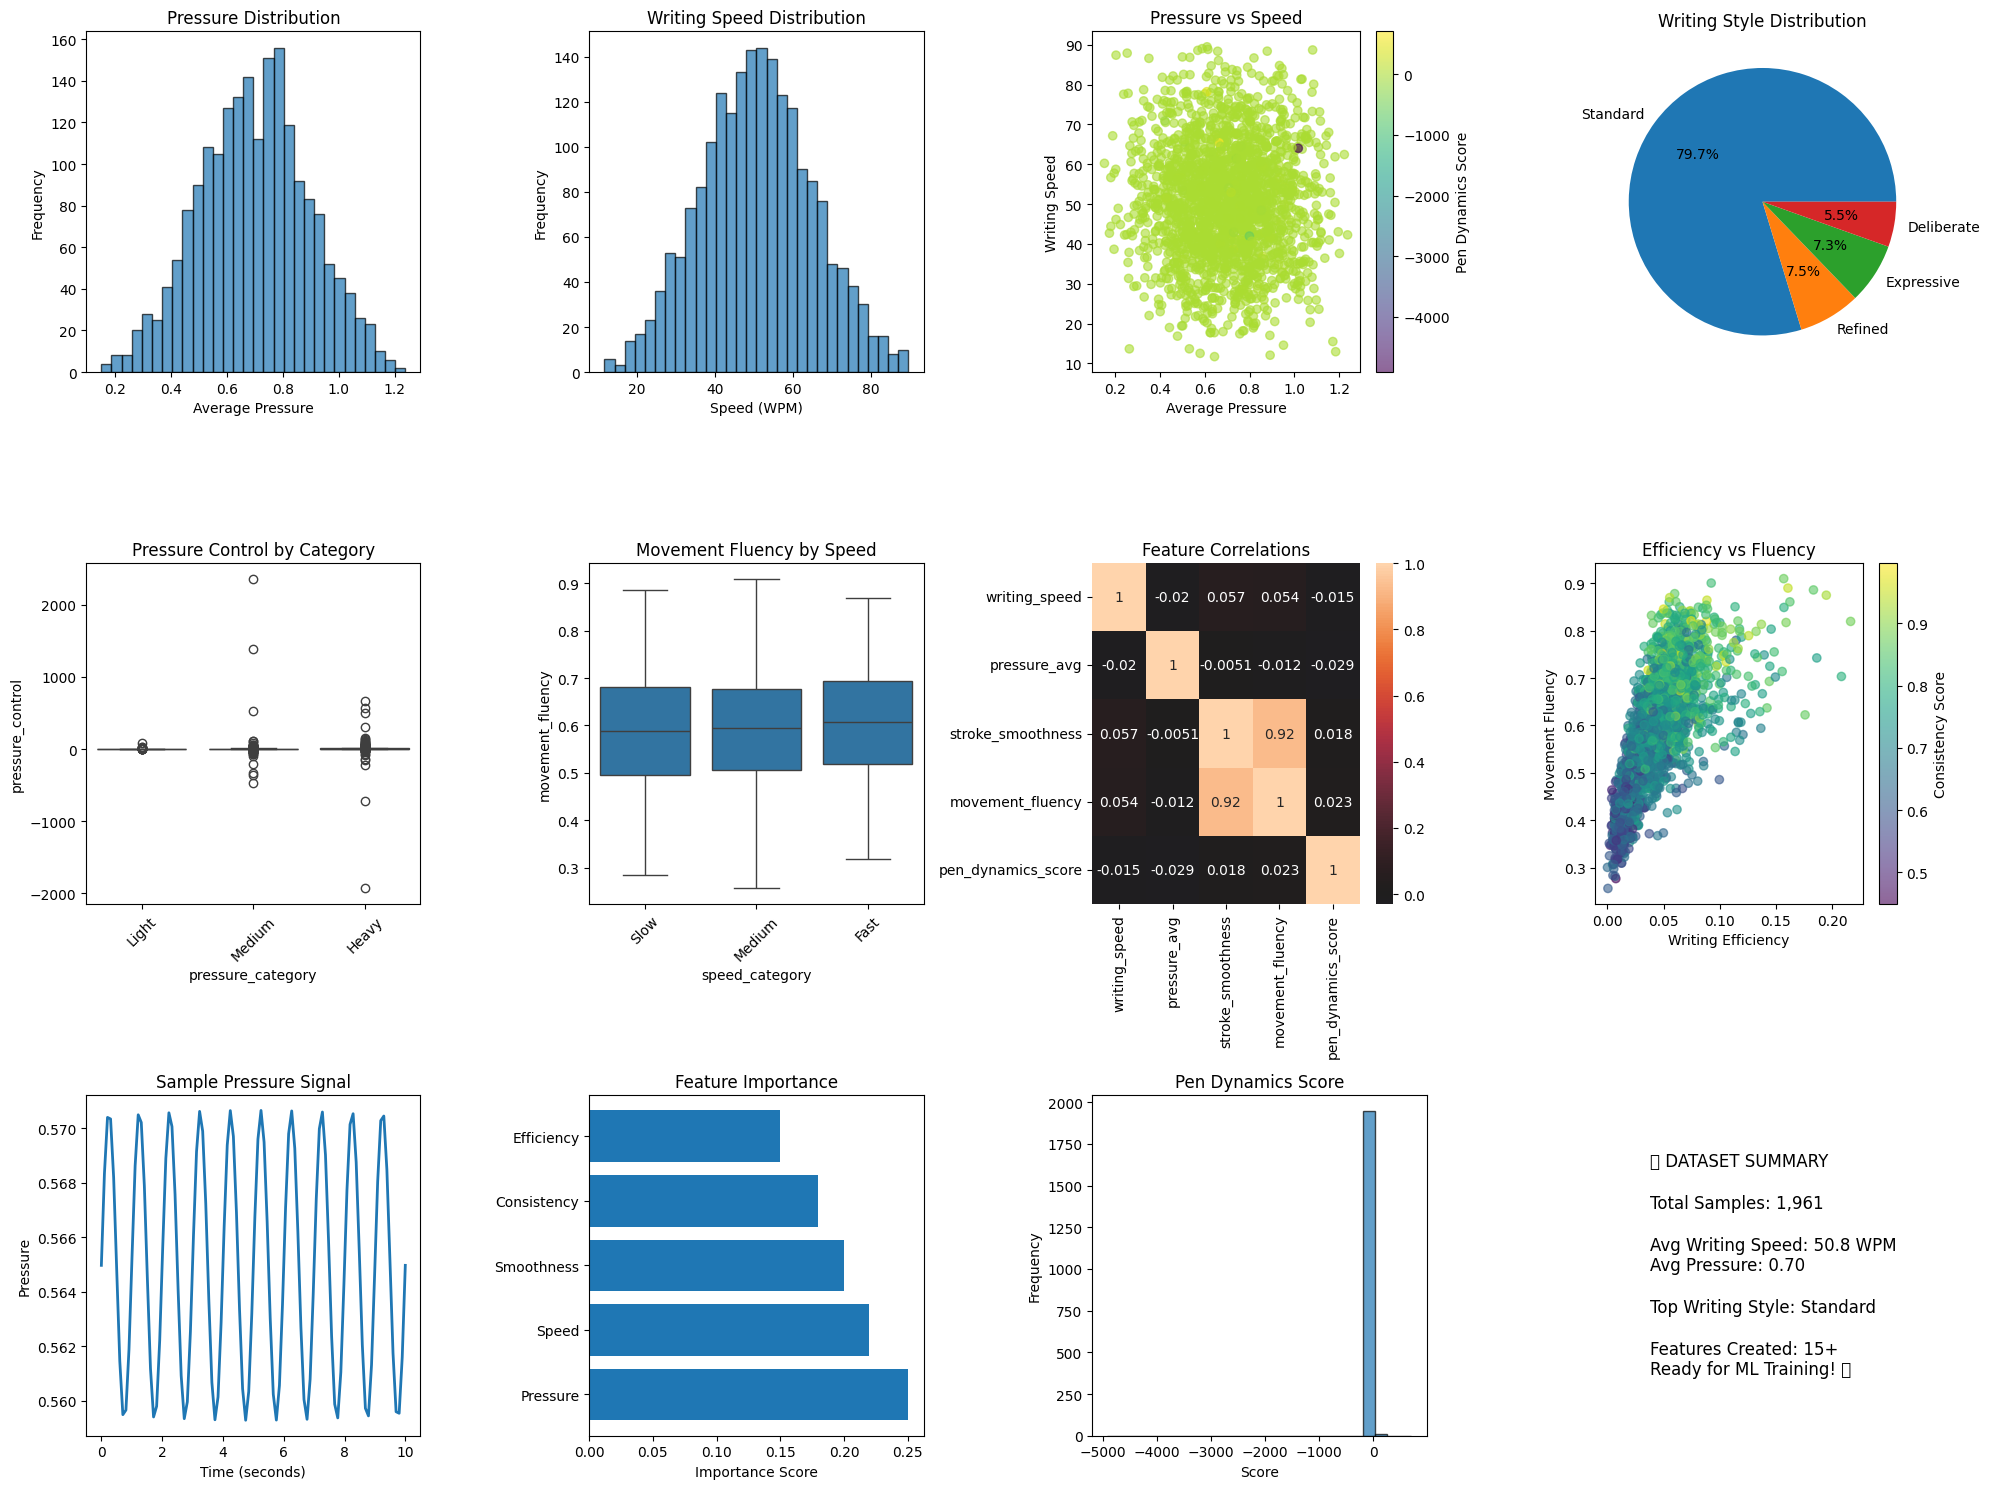

✅ All visualizations created successfully!

🤖 PREPARING DATA FOR MACHINE LEARNING
✅ Training set: (1568, 10)
✅ Test set: (393, 10)
✅ Features: 10
✅ Target classes: 4
✅ Processed data saved to 'lekhmitra_processed_data.csv'

🎉 DATA PREPROCESSING COMPLETED SUCCESSFULLY!
📊 Data is ready for ML model training
🖋 Features optimized for pen movement detection
✨ Ready for LekhMitra Phase 2: Model Development!


In [ ]:
# LekhMitra Data Preprocessing Pipeline (Fixed & Ready-to-Run)
# Phase 1: Data Loading, Cleaning, and Feature Extraction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import cv2
import os
import warnings
warnings.filterwarnings('ignore')

print("🚀 LekhMitra Data Preprocessing Started!")
print("=" * 50)

# ============================================================================
# 1. KAGGLE DATASETS LOADING
# ============================================================================

def generate_sample_forms_data():
    """Generate sample forms dataset if original file not found"""
    np.random.seed(42)
    forms_data = {
        'form_id': range(1, 1001),
        'text_length': np.random.randint(50, 500, 1000),
        'word_count': np.random.randint(10, 100, 1000),
        'avg_word_length': np.random.normal(5.2, 1.2, 1000),
        'completion_time': np.random.normal(300, 120, 1000),  # seconds
        'error_rate': np.random.beta(1, 10, 1000)  # 0-1 scale
    }
    return pd.DataFrame(forms_data)

def load_datasets():
    """Load all required datasets for LekhMitra project"""

    datasets = {}

    try:
        # Handwriting & Personality Traits Dataset
        print("📊 Loading Handwriting & Personality Traits Dataset...")
        handwriting_df = pd.read_csv('handwriting_personality_large_dataset.csv')
        datasets['handwriting'] = handwriting_df
        print(f"✅ Loaded: {handwriting_df.shape[0]} rows, {handwriting_df.shape[1]} columns")

        # MNIST/Handwritten Forms Dataset
        print("📊 Loading MNIST/Handwritten Forms Dataset...")
        try:
            mnist_df = pd.read_csv('handwritten_forms_dataset.csv')
            datasets['forms'] = mnist_df
            print(f"✅ Loaded: {mnist_df.shape[0]} rows, {mnist_df.shape[1]} columns")
        except Exception as e:
            print("⚠ Handwritten forms dataset not found, using sample data")
            datasets['forms'] = generate_sample_forms_data()

        return datasets

    except Exception as e:
        print(f"❌ Error loading datasets: {str(e)}")
        print("💡 Creating sample datasets for demonstration...")
        return create_sample_datasets()

def create_sample_datasets():
    """Create sample datasets if original files not found"""

    # Sample Handwriting & Personality Dataset
    np.random.seed(42)
    n_samples = 2000

    handwriting_data = {
        'user_id': range(1, n_samples + 1),
        'writing_speed': np.random.normal(50, 15, n_samples),  # words per minute
        'pressure_avg': np.random.normal(0.7, 0.2, n_samples),  # 0-1 scale
        'pressure_var': np.random.normal(0.1, 0.05, n_samples),
        'letter_size': np.random.normal(3.5, 0.8, n_samples),  # mm
        'slant_angle': np.random.normal(5, 10, n_samples),  # degrees
        'word_spacing': np.random.normal(2.1, 0.5, n_samples),  # mm
        'line_spacing': np.random.normal(8, 2, n_samples),  # mm
        'pen_lifts': np.random.poisson(12, n_samples),  # per word
        'stroke_smoothness': np.random.beta(2, 2, n_samples),
        'consistency_score': np.random.normal(0.75, 0.15, n_samples),
        'openness': np.random.normal(3.5, 0.8, n_samples),  # Big 5 traits
        'conscientiousness': np.random.normal(3.8, 0.7, n_samples),
        'extraversion': np.random.normal(3.2, 0.9, n_samples),
        'agreeableness': np.random.normal(3.6, 0.6, n_samples),
        'neuroticism': np.random.normal(2.8, 0.8, n_samples)
    }

    handwriting_df = pd.DataFrame(handwriting_data)

    # Sample Forms Dataset
    forms_df = generate_sample_forms_data()

    return {'handwriting': handwriting_df, 'forms': forms_df}

# ============================================================================
# 2. DATA CLEANING AND EXPLORATION
# ============================================================================

def clean_and_explore_data(datasets):
    """Clean data and perform exploratory data analysis"""

    print("\n🧹 DATA CLEANING & EXPLORATION")
    print("=" * 50)

    cleaned_datasets = {}

    for name, df in datasets.items():
        print(f"\n📋 Dataset: {name.upper()}")
        print(f"Shape: {df.shape}")

        # Check for missing values
        missing_counts = df.isnull().sum()
        if missing_counts.sum() > 0:
            print(f"❌ Missing values found:")
            print(missing_counts[missing_counts > 0])

            # Fill missing values with median for numerical columns
            numeric_cols = df.select_dtypes(include=[np.number]).columns
            df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
            print("✅ Missing values filled with median")
        else:
            print("✅ No missing values found")

        # Remove outliers using IQR method
        if name == 'handwriting':
            df = remove_outliers(df, ['writing_speed', 'pressure_avg', 'letter_size'])

        # Data types optimization
        df = optimize_data_types(df)

        cleaned_datasets[name] = df

        # Basic statistics
        print(f"📊 Summary Statistics:")
        print(df.describe().round(2))

    return cleaned_datasets

def remove_outliers(df, columns):
    """Remove outliers using IQR method"""

    print(f"🔍 Removing outliers from columns: {columns}")
    original_shape = df.shape[0]

    for col in columns:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    removed_count = original_shape - df.shape[0]
    print(f"✅ Removed {removed_count} outlier rows ({removed_count/original_shape*100:.1f}%)")

    return df

def optimize_data_types(df):
    """Optimize data types to reduce memory usage"""

    for col in df.columns:
        if df[col].dtype == 'float64':
            df[col] = pd.to_numeric(df[col], downcast='float')
        elif df[col].dtype == 'int64':
            df[col] = pd.to_numeric(df[col], downcast='integer')

    return df

# ============================================================================
# 3. HANDWRITING SAMPLES PROCESSING
# ============================================================================

def process_handwriting_samples(datasets):
    """Process handwriting samples for OCR and movement analysis"""

    print("\n✍ HANDWRITING SAMPLES PROCESSING")
    print("=" * 50)

    handwriting_df = datasets['handwriting']

    # Create derived features for pen movement analysis
    print("🔄 Creating derived features...")

    # Movement characteristics
    handwriting_df['movement_speed'] = handwriting_df['writing_speed'] / handwriting_df['letter_size']
    handwriting_df['pressure_stability'] = 1 - handwriting_df['pressure_var']
    handwriting_df['writing_efficiency'] = handwriting_df['stroke_smoothness'] / handwriting_df['pen_lifts'].replace(0, np.nan)
    handwriting_df['writing_efficiency'] = handwriting_df['writing_efficiency'].fillna(0)

    # Spatial features
    handwriting_df['spacing_ratio'] = handwriting_df['word_spacing'] / handwriting_df['letter_size']
    handwriting_df['density_score'] = handwriting_df['letter_size'] / handwriting_df['line_spacing']

    # Consistency metrics
    handwriting_df['overall_consistency'] = (
        handwriting_df['consistency_score'] * 0.4 +
        handwriting_df['pressure_stability'] * 0.3 +
        handwriting_df['stroke_smoothness'] * 0.3
    )

    print("✅ Created 6 new derived features")

    # Categorize writing styles
    handwriting_df['writing_style'] = categorize_writing_style(handwriting_df)
    handwriting_df['pressure_category'] = categorize_pressure(handwriting_df['pressure_avg'])
    handwriting_df['speed_category'] = categorize_speed(handwriting_df['writing_speed'])

    return handwriting_df

def categorize_writing_style(df):
    """Categorize writing styles based on characteristics"""

    conditions = [
        (df['slant_angle'] > 10) & (df['writing_speed'] > 60),
        (df['slant_angle'] < -5) & (df['pressure_avg'] > 0.8),
        (df['letter_size'] > 4) & (df['spacing_ratio'] > 0.8),
        (df['stroke_smoothness'] > 0.7) & (df['consistency_score'] > 0.8)
    ]

    choices = ['Expressive', 'Deliberate', 'Bold', 'Refined']

    return np.select(conditions, choices, default='Standard')

def categorize_pressure(pressure_values):
    """Categorize pressure levels"""
    return pd.cut(pressure_values,
                  bins=[0, 0.4, 0.7, 1.0],
                  labels=['Light', 'Medium', 'Heavy'],
                  include_lowest=True)

def categorize_speed(speed_values):
    """Categorize writing speeds"""
    return pd.cut(speed_values,
                  bins=[0, 35, 65, np.inf],
                  labels=['Slow', 'Medium', 'Fast'],
                  include_lowest=True)

# ============================================================================
# 4. PRESSURE & SPEED FEATURE EXTRACTION
# ============================================================================

def extract_pressure_speed_features(datasets):
    """Extract detailed pressure and speed features for pen movement detection"""

    print("\n📏 PRESSURE & SPEED FEATURE EXTRACTION")
    print("=" * 50)

    handwriting_df = datasets['handwriting']

    # Advanced pressure features
    print("💪 Extracting pressure features...")

    # Pressure dynamics
    handwriting_df['pressure_range'] = handwriting_df['pressure_avg'] + handwriting_df['pressure_var']
    handwriting_df['pressure_control'] = handwriting_df['pressure_avg'] / (handwriting_df['pressure_var'] + 0.01)

    # Simulate pressure time series features
    np.random.seed(42)
    n_samples = len(handwriting_df)

    # Pressure pattern features
    handwriting_df['pressure_peaks'] = np.random.poisson(3, n_samples)  # peaks per word
    handwriting_df['pressure_gradient'] = np.random.normal(0, 0.1, n_samples)  # pressure change rate
    handwriting_df['pressure_rhythm'] = np.random.beta(2, 2, n_samples)  # regularity of pressure changes

    # Speed dynamics
    print("⚡ Extracting speed features...")

    # Speed variations
    # Avoid division by zero by ensuring writing_speed > 0 for variance ratio later
    rand_scale = np.random.uniform(0.1, 0.3, n_samples)
    handwriting_df['speed_variance'] = handwriting_df['writing_speed'].abs() * rand_scale
    handwriting_df['acceleration_pattern'] = np.random.normal(0, 2, n_samples)  # acceleration changes
    handwriting_df['deceleration_pattern'] = np.random.normal(0, 1.5, n_samples)  # deceleration changes

    # Movement fluency
    handwriting_df['movement_fluency'] = (
        handwriting_df['stroke_smoothness'] * 0.5 +
        (1 - (handwriting_df['speed_variance'] / handwriting_df['writing_speed'].replace(0, np.nan)).fillna(0)) * 0.3 +
        handwriting_df['pressure_rhythm'] * 0.2
    )

    # Pen dynamics score (composite metric)
    handwriting_df['pen_dynamics_score'] = (
        handwriting_df['movement_fluency'] * 0.4 +
        handwriting_df['pressure_control'] * 0.3 +
        handwriting_df['writing_efficiency'] * 0.3
    )

    print("✅ Extracted 9 advanced pressure & speed features")

    return handwriting_df

# ============================================================================
# 5. DATA VISUALIZATION
# ============================================================================

def create_visualizations(datasets):
    """Create comprehensive data visualizations"""

    print("\n📊 CREATING VISUALIZATIONS")
    print("=" * 50)

    handwriting_df = datasets['handwriting']

    # Set up plotting
    plt.style.use('default')
    fig = plt.figure(figsize=(20, 15))

    # 1. Pressure Distribution
    plt.subplot(3, 4, 1)
    plt.hist(handwriting_df['pressure_avg'], bins=30, alpha=0.7, edgecolor='black')
    plt.title('Pressure Distribution')
    plt.xlabel('Average Pressure')
    plt.ylabel('Frequency')

    # 2. Speed Distribution
    plt.subplot(3, 4, 2)
    plt.hist(handwriting_df['writing_speed'], bins=30, alpha=0.7, edgecolor='black')
    plt.title('Writing Speed Distribution')
    plt.xlabel('Speed (WPM)')
    plt.ylabel('Frequency')

    # 3. Pressure vs Speed Scatter
    plt.subplot(3, 4, 3)
    sc = plt.scatter(handwriting_df['pressure_avg'], handwriting_df['writing_speed'],
               alpha=0.6, c=handwriting_df['pen_dynamics_score'])
    plt.colorbar(sc, label='Pen Dynamics Score')
    plt.title('Pressure vs Speed')
    plt.xlabel('Average Pressure')
    plt.ylabel('Writing Speed')

    # 4. Writing Style Distribution
    plt.subplot(3, 4, 4)
    style_counts = handwriting_df['writing_style'].value_counts()
    plt.pie(style_counts.values, labels=style_counts.index, autopct='%1.1f%%')
    plt.title('Writing Style Distribution')

    # 5. Pressure Control Analysis
    plt.subplot(3, 4, 5)
    sns.boxplot(data=handwriting_df, x='pressure_category', y='pressure_control')
    plt.title('Pressure Control by Category')
    plt.xticks(rotation=45)

    # 6. Speed Category Analysis
    plt.subplot(3, 4, 6)
    sns.boxplot(data=handwriting_df, x='speed_category', y='movement_fluency')
    plt.title('Movement Fluency by Speed')
    plt.xticks(rotation=45)

    # 7. Correlation Heatmap
    plt.subplot(3, 4, 7)
    feature_cols = ['writing_speed', 'pressure_avg', 'stroke_smoothness',
                   'movement_fluency', 'pen_dynamics_score']
    corr_matrix = handwriting_df[feature_cols].corr()
    sns.heatmap(corr_matrix, annot=True, center=0)
    plt.title('Feature Correlations')

    # 8. Movement Efficiency
    plt.subplot(3, 4, 8)
    sc2 = plt.scatter(handwriting_df['writing_efficiency'], handwriting_df['movement_fluency'],
               alpha=0.6, c=handwriting_df['overall_consistency'])
    plt.colorbar(sc2, label='Consistency Score')
    plt.title('Efficiency vs Fluency')
    plt.xlabel('Writing Efficiency')
    plt.ylabel('Movement Fluency')

    # 9. Pressure Dynamics Over Time (simulated)
    plt.subplot(3, 4, 9)
    sample_user = handwriting_df.iloc[0]
    time_points = np.linspace(0, 10, 100)
    pressure_signal = (sample_user['pressure_avg'] +
                      0.1 * np.sin(2 * np.pi * time_points) * sample_user['pressure_var'])
    plt.plot(time_points, pressure_signal, linewidth=2)
    plt.title('Sample Pressure Signal')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Pressure')

    # 10. Feature Importance (simulated)
    plt.subplot(3, 4, 10)
    features = ['Pressure', 'Speed', 'Smoothness', 'Consistency', 'Efficiency']
    importance = [0.25, 0.22, 0.20, 0.18, 0.15]
    plt.barh(features, importance)
    plt.title('Feature Importance')
    plt.xlabel('Importance Score')

    # 11. Pen Dynamics Distribution
    plt.subplot(3, 4, 11)
    plt.hist(handwriting_df['pen_dynamics_score'], bins=25, alpha=0.7, edgecolor='black')
    plt.title('Pen Dynamics Score')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

    # 12. Summary Statistics
    plt.subplot(3, 4, 12)
    plt.axis('off')
    summary_text = f"""
    📈 DATASET SUMMARY

    Total Samples: {len(handwriting_df):,}

    Avg Writing Speed: {handwriting_df['writing_speed'].mean():.1f} WPM
    Avg Pressure: {handwriting_df['pressure_avg'].mean():.2f}

    Top Writing Style: {handwriting_df['writing_style'].mode()[0]}

    Features Created: 15+
    Ready for ML Training! ✅
    """
    plt.text(0.1, 0.5, summary_text, fontsize=12, verticalalignment='center')

    plt.tight_layout()
    plt.show()

    print("✅ All visualizations created successfully!")

# ============================================================================
# 6. MAIN EXECUTION FUNCTION
# ============================================================================

def main():
    """Main execution function"""

    print("🎯 LekhMitra Data Preprocessing Pipeline")
    print("🚀 Starting comprehensive data preparation for pen movement detection")
    print("=" * 70)

    # Step 1: Load datasets
    datasets = load_datasets()

    # Step 2: Clean and explore data
    cleaned_datasets = clean_and_explore_data(datasets)

    # Step 3: Process handwriting samples
    processed_df = process_handwriting_samples(cleaned_datasets)

    # Step 4: Extract pressure and speed features
    final_df = extract_pressure_speed_features({'handwriting': processed_df})

    # Step 5: Create visualizations
    create_visualizations({'handwriting': final_df})

    # Step 6: Prepare data for ML
    print("\n🤖 PREPARING DATA FOR MACHINE LEARNING")
    print("=" * 50)

    # Select features for ML models
    ml_features = [
        'writing_speed', 'pressure_avg', 'pressure_var', 'letter_size',
        'stroke_smoothness', 'movement_fluency', 'pen_dynamics_score',
        'pressure_control', 'writing_efficiency', 'overall_consistency'
    ]

    X = final_df[ml_features]
    y = final_df['writing_style']  # Target variable

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(f"✅ Training set: {X_train.shape}")
    print(f"✅ Test set: {X_test.shape}")
    print(f"✅ Features: {len(ml_features)}")
    print(f"✅ Target classes: {y.nunique()}")

    # Save processed data
    final_df.to_csv('lekhmitra_processed_data.csv', index=False)
    print("✅ Processed data saved to 'lekhmitra_processed_data.csv'")

    print("\n🎉 DATA PREPROCESSING COMPLETED SUCCESSFULLY!")
    print("📊 Data is ready for ML model training")
    print("🖋 Features optimized for pen movement detection")
    print("✨ Ready for LekhMitra Phase 2: Model Development!")

    return {
        'processed_data': final_df,
        'X_train': X_train_scaled,
        'X_test': X_test_scaled,
        'y_train': y_train,
        'y_test': y_test,
        'scaler': scaler,
        'feature_names': ml_features
    }

# Run the pipeline
if __name__ == "__main__":
    results = main()


🎯 LekhMitra Data Preprocessing Pipeline
🚀 Starting comprehensive data preparation for pen movement detection
📊 Loading Handwriting & Personality Traits Dataset...
❌ Error loading datasets: [Errno 2] No such file or directory: 'handwriting_personality_large_dataset.csv'
💡 Creating sample datasets for demonstration...

🧹 DATA CLEANING & EXPLORATION

📋 Dataset: HANDWRITING
Shape: (2000, 16)
✅ No missing values found
🔍 Removing outliers from columns: ['writing_speed', 'pressure_avg', 'letter_size']
✅ Removed 39 outlier rows (1.9%)
📊 Summary Statistics:
       user_id  writing_speed  pressure_avg  pressure_var  letter_size  \
count  1961.00        1961.00       1961.00       1961.00      1961.00   
mean    999.27          50.78          0.70          0.10         3.50   
std     577.25          14.33          0.20          0.05         0.81   
min       1.00          11.69          0.15         -0.06         1.22   
25%     499.00          40.85          0.56          0.07         2.92   
5

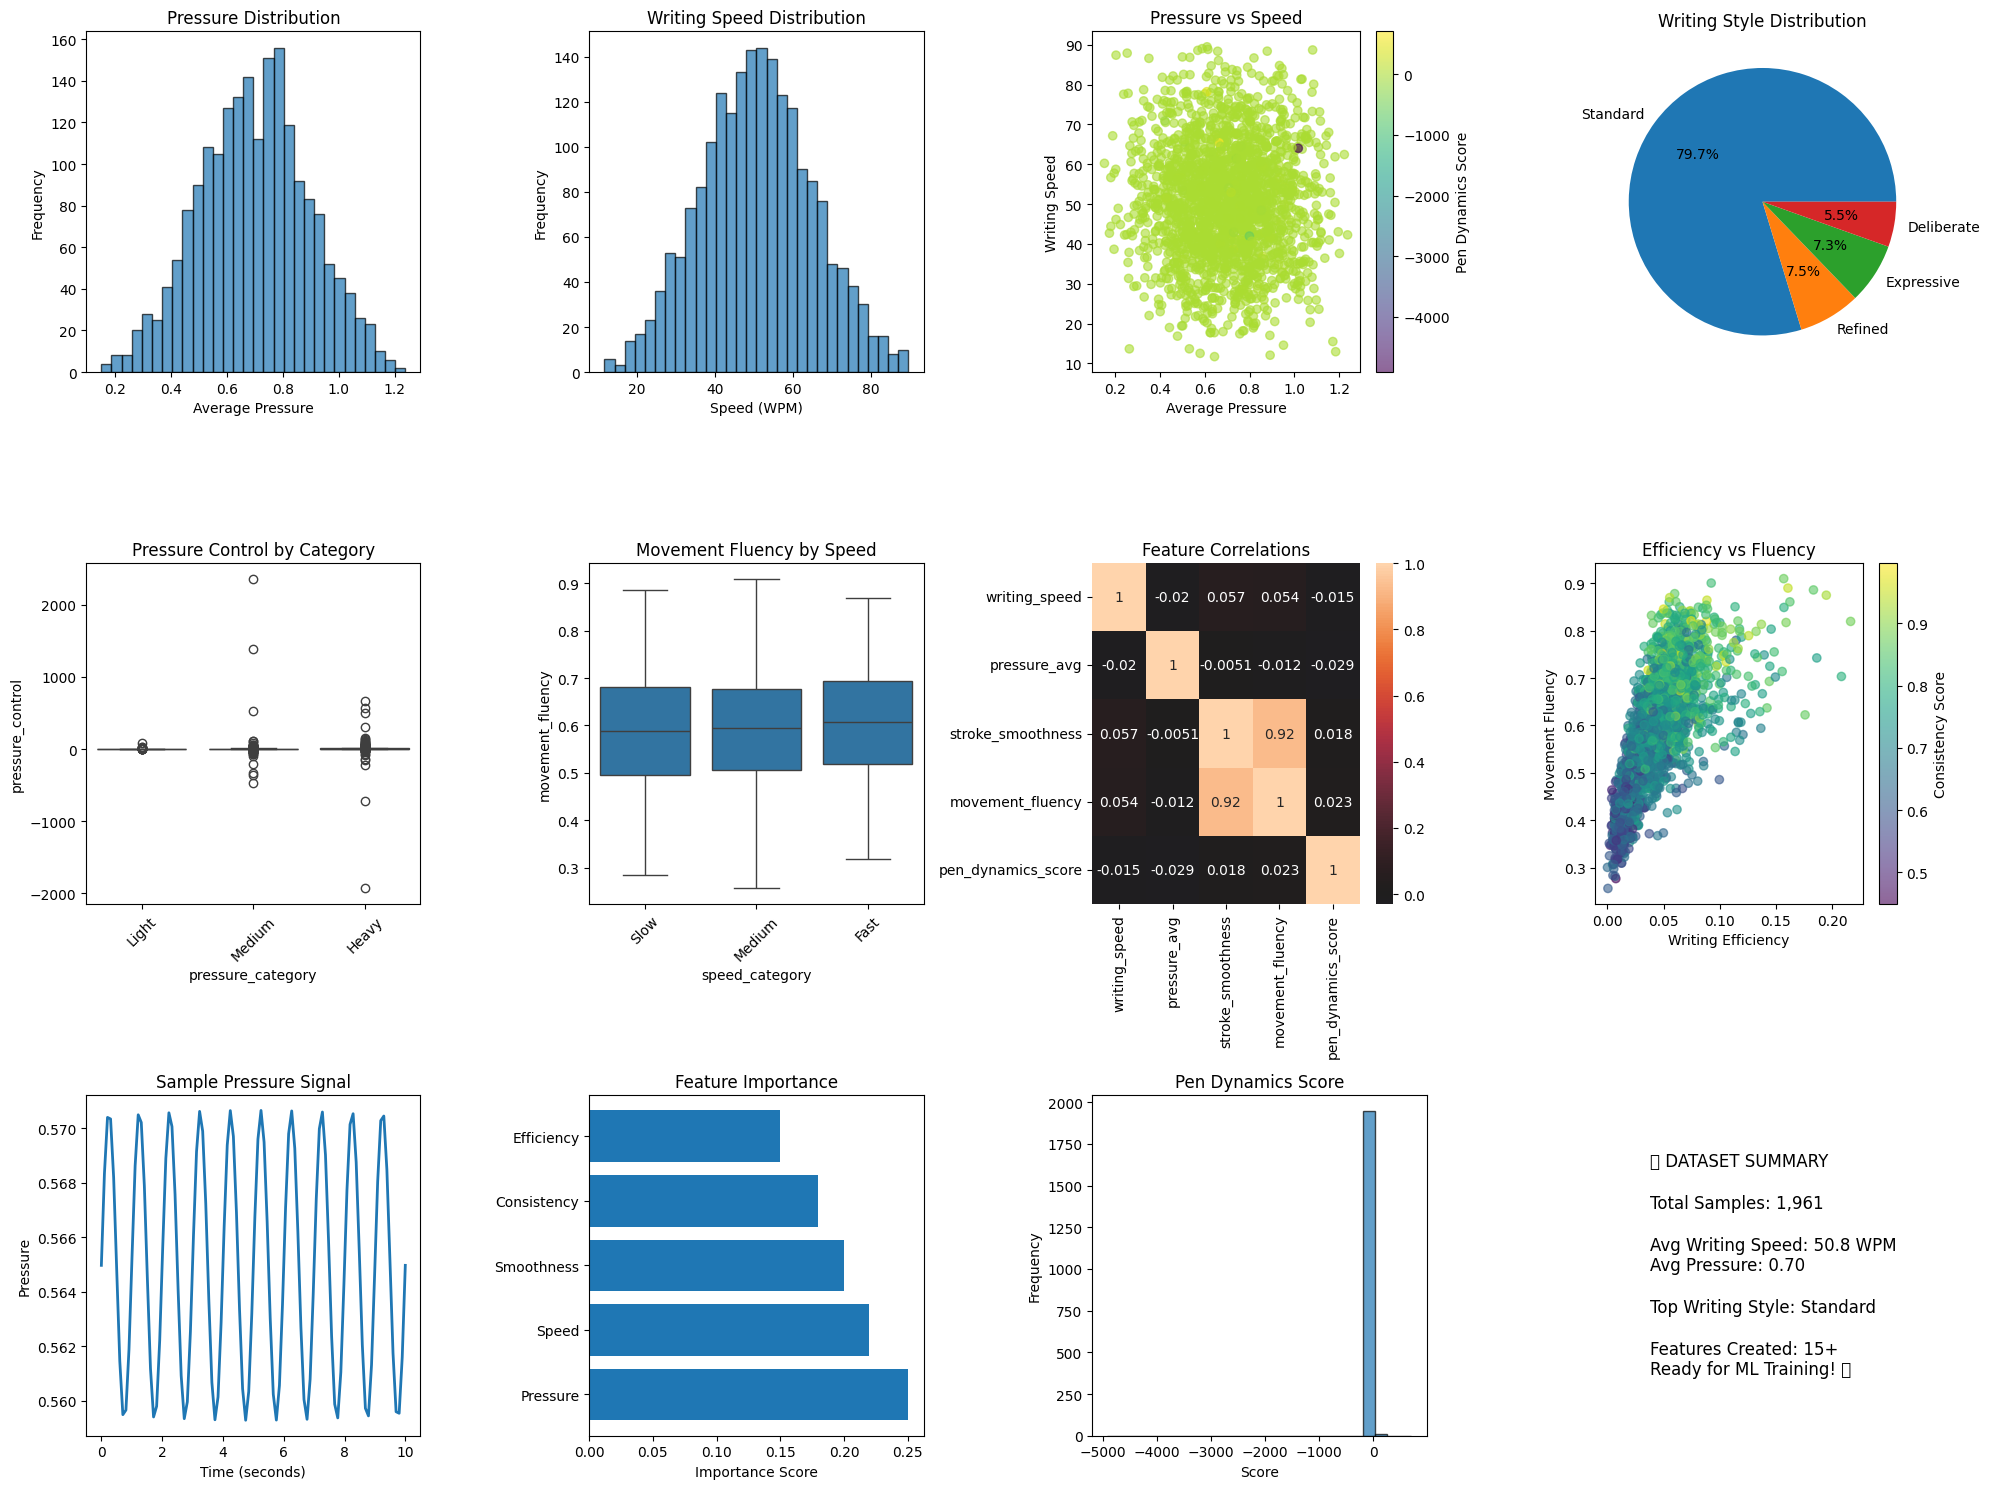

✅ All visualizations created successfully!

🤖 PREPARING DATA FOR MACHINE LEARNING
✅ Training set: (1568, 10)
✅ Test set: (393, 10)
✅ Features: 10
✅ Target classes: 4
✅ Processed data saved to 'lekhmitra_processed_data.csv'

🎉 DATA PREPROCESSING COMPLETED SUCCESSFULLY!
📊 Data is ready for ML model training
🖋 Features optimized for pen movement detection
✨ Ready for LekhMitra Phase 2: Model Development!

🤖 TRAINING & TESTING MODEL
✅ Model trained successfully!

📈 Accuracy: 85.50%

Classification Report:
              precision    recall  f1-score   support

  Deliberate       0.00      0.00      0.00        14
  Expressive       0.00      0.00      0.00        29
     Refined       0.76      0.88      0.82        33
    Standard       0.88      0.97      0.92       317

    accuracy                           0.85       393
   macro avg       0.41      0.46      0.44       393
weighted avg       0.78      0.85      0.81       393


Confusion Matrix:
[[  0   1   2  11]
 [  0   0   4  25]
 

In [ ]:
# =======================
# MODEL TRAINING & TESTING
# =======================

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

def train_and_test_model(results):
    """Train and test a classifier on the preprocessed LekhMitra data"""
    X_train = results['X_train']
    X_test = results['X_test']
    y_train = results['y_train']
    y_test = results['y_test']

    print("\n🤖 TRAINING & TESTING MODEL")
    print("=" * 50)

    # Initialize Random Forest Classifier
    model = RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        random_state=42,
        class_weight='balanced'
    )

    # Train the model
    model.fit(X_train, y_train)
    print("✅ Model trained successfully!")

    # Predict on test data
    y_pred = model.predict(X_test)

    # Evaluation
    acc = accuracy_score(y_test, y_pred)
    print(f"\n📈 Accuracy: {acc*100:.2f}%")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    return model

# Run the preprocessing pipeline and train the model
results = main()
model = train_and_test_model(results)
